Training Model

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('ramen_rating_2023_final.csv')
df

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Bowl,With_Cup,With_Other,With_Pack,...,In_Indonesia,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam
0,5.0,NaN,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5.0,NaN,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4628,1.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4629,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4630,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df['Stars'].value_counts()

Stars
5.000    938
3.500    678
3.750    643
4.000    541
4.500    315
3.250    250
4.250    240
3.000    208
2.750    124
2.000    124
2.500    117
4.750    113
1.500     64
0.000     61
1.000     53
1.750     35
2.250     33
0.500     26
0.250     24
1.250     18
0.750      3
3.100      2
4.125      2
2.900      2
1.100      2
2.800      2
4.350      1
3.400      1
3.650      1
3.200      1
2.300      1
2.850      1
3.600      1
0.100      1
3.700      1
2.125      1
3.125      1
0.900      1
2.100      1
1.800      1
Name: count, dtype: int64

(array([  86.,   30.,   73.,  100.,  160.,  246.,  463., 1324.,  784.,
        1366.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

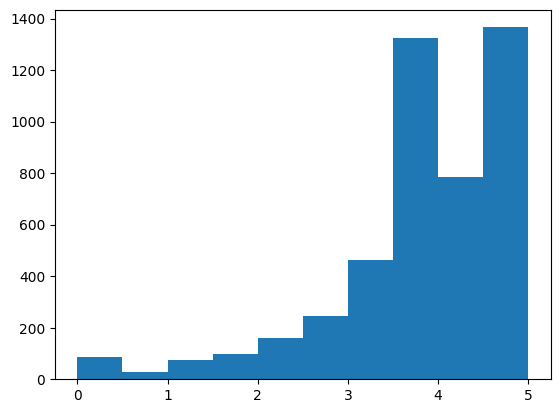

In [52]:
plt.hist(df['Stars'])

In [53]:
df['Stars'].median()

3.75

In [54]:
df['binStars'] = df['Stars'].apply(lambda x: 1 if x > 3.75 else 0)
df

,Stars,T,IsSpicy,HasChicken,HasBeef,HasSeafoods,With_Bowl,With_Cup,With_Other,With_Pack,...,In_Japan,In_Malaysia,In_Other,In_Singapore,In_South Korea,In_Taiwan,In_Thailand,In_United States,In_Vietnam,binStars
0,5.0,NaN,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,5.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,4.5,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,5.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,3.5,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4628,1.0,NaN,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4629,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4630,2.0,NaN,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [55]:
df['HasSeafoods'].value_counts()

HasSeafoods
0    3934
1     698
Name: count, dtype: int64

In [56]:
df['binStars'].value_counts()

binStars
0    2482
1    2150
Name: count, dtype: int64

In [57]:
x = df.drop(['binStars', 'Stars','T'], axis=1)
y = df['binStars']

In [58]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

LogisticRegression

In [59]:
#LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)

In [60]:
confusion_matrix(y_test, logr_pred)

array([[323, 174],
       [164, 266]], dtype=int64)

In [61]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       497
           1       0.60      0.62      0.61       430

    accuracy                           0.64       927
   macro avg       0.63      0.63      0.63       927
weighted avg       0.64      0.64      0.64       927



DecisionTreeClassifier

In [62]:
#decisiontreeclassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

In [63]:
confusion_matrix(y_test, tree_pred)

array([[336, 161],
       [191, 239]], dtype=int64)

In [64]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       497
           1       0.60      0.56      0.58       430

    accuracy                           0.62       927
   macro avg       0.62      0.62      0.62       927
weighted avg       0.62      0.62      0.62       927



RandomForestClassifier

In [65]:
#RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

In [66]:
confusion_matrix(y_test, forest_pred)

array([[318, 179],
       [168, 262]], dtype=int64)

In [67]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       497
           1       0.59      0.61      0.60       430

    accuracy                           0.63       927
   macro avg       0.62      0.62      0.62       927
weighted avg       0.63      0.63      0.63       927



Kiểm tra các hệ số thể hiện mức độ ảnh hưởng của mỗi đặc trưng đến dự đoán của mô hình

In [68]:
logr_feature = pd.DataFrame({"feature": x.columns,
                             "importance": logr.coef_[0]})
logr_feature.sort_values('importance', ascending=False)

,feature,importance
6,With_Other,1.028337
22,In_Indonesia,0.840620
15,from_Nongshim,0.828389
24,In_Malaysia,0.802351
18,from_Samyang Foods,0.710361
28,In_Taiwan,0.530657
26,In_Singapore,0.485088
23,In_Japan,0.399107
0,IsSpicy,0.298792
17,from_Paldo,0.287678


In [69]:
tree_feature = pd.DataFrame({"feature": x.columns,
                             "importance": tree.feature_importances_})
tree_feature.sort_values('importance', ascending=False)

,feature,importance
25,In_Other,0.116693
0,IsSpicy,0.086041
3,HasSeafoods,0.073838
29,In_Thailand,0.054403
2,HasBeef,0.052045
1,HasChicken,0.050861
7,With_Pack,0.050760
5,With_Cup,0.050581
31,In_Vietnam,0.047677
14,from_Nissin,0.037414


In [70]:
forest_feature = pd.DataFrame({"feature": x.columns,
                             "importance": forest.feature_importances_})
forest_feature.sort_values('importance', ascending=False)

,feature,importance
0,IsSpicy,0.102033
3,HasSeafoods,0.086721
25,In_Other,0.081588
1,HasChicken,0.072811
2,HasBeef,0.057620
5,With_Cup,0.045140
16,from_Other,0.038509
7,With_Pack,0.036881
30,In_United States,0.034968
4,With_Bowl,0.033753


In [71]:
import pickle

In [72]:
pickle.dump(logr, open('LogR_Model.pkl','wb'))
pickle.dump(tree, open('Tree_Model.pkl','wb'))
pickle.dump(forest, open('Forest_Model.pkl','wb'))